# Importing Required Libraries

In [1]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from keras.models import model_from_json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# loading Models

In [2]:
face_cascade = cv2.CascadeClassifier("../input/facial-expression-detection-dataset/haarcascades/haarcascade_frontalface_default.xml")
#---------------------------------------
#face expression recognizer initialization
model = model_from_json(open('../input/facial-expression-detection-dataset/facial_expression_structure.json',"r").read())
model.load_weights("../input/facial-expression-detection-dataset/model_weights.h5")

2022-09-11 06:28:55.463378: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Assigning Emotions

In [3]:
#-----------------------------------
emotions = ('angry','disgust','fear','happy','sad','surprise','neutral')
result = [0]*7
result1 = [0.0]*7


# Function for write resulted image with emotions, probability bar and accuracy

In [4]:
# function for test images
def testing(img_path):
    # succes,img = cap.read()
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if(len(faces)==0):
        cv2.putText(img, "No Face Detected", (10,(1*20 +8)),font,0.5,(255,0,255),2)
    else:
        for(x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#draw rectangle to main image
            detected_face = img[int(y):int(y+h),int(x):int(x+w)]#crop detected face
            detected_face = cv2.cvtColor(detected_face,cv2.COLOR_BGR2GRAY)#TRANSFORM INTO GRAYSCALE
            detected_face = cv2.resize(detected_face,(48,48))
            
            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels,axis = 0)
            #img_pixels = 255
            predictions = model.predict(img_pixels) #store probilities of 7 expressions
            max_index = np.argmax(predictions[0])#find max indexed array

            emotion = emotions[max_index]
            result[max_index] = result[max_index]+1
            result1[max_index] = result1[max_index] + round(predictions[0][max_index]*100,2)

            y1 = y
            y = y + 20
            #write emotions text above rectangle
            cv2.putText(img,emotion,(int(x),int(y1)),font,1,(255,0,255),2)
            cv2.putText(img,"Emotions",(10,10),font,0.5,(0,0,0),2)
            cv2.putText(img,"| Probility",(100,10),font,0.5,(0,0,0),2)
            cv2.putText(img,"| Probility Bar",(200,10),font,0.5,(0,0,0),2)

            bar = ".............................................................."
            z = 0
            for i in range(len(predictions[0])):
                b = bar[0:int(predictions[0][i]*len(bar))]
                if(i == max_index):
                    cv2.putText(img,emotions[i] + ": ",(10,(i+1)*20+8),font,0.5,(255,0,255),2)
                    cv2.putText(img,"| ",(100,(i+1)*20+8),font,0.5,(0,0,0),2)
                    cv2.putText(img," "+ str(round(predictions[0][i]*100,2)),(110,(i+1)*20+8),font,0.5,(255,255,255),2)
                    cv2.putText(img,"| ",(200,(i+1)*20+8),font,0.5,(0,0,0),2)

                    cv2.rectangle(img,(210, i*20 + 10),(210 + int(predictions[0][i]*100),(i+1)*20 +4),(255,0,0),-1)

                else:
                    cv2.putText(img,emotions[i] + ": ",(10,(i+1)*20+8),font,0.5,(0,255,0),2)
                    cv2.putText(img,"| ",(100,(i+1)*20+8),font,0.5,(0,0,0),2)
                    cv2.putText(img," "+ str(round(predictions[0][i]*100,2)),(110,(i+1)*20+8),font,0.5,(255,0,0),2)
                    cv2.putText(img,"| ",(200,(i+1)*20+8),font,0.5,(0,0,0),2)

                    cv2.rectangle(img,(210, i*20 + 10),(210 + int(predictions[0][i]*100),(i+1)*20 +4),(255,0,0),-1)
                   
#     cv2.imwrite((img_path[:-4]+'_result.png'),img)
    imgplot = plt.imshow(img)


# Function for write image with only emotions

In [5]:
def testing_1(img_path):
    # succes,img = cap.read()
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if(len(faces)==0):
        cv2.putText(img, "No Face Detected", (10,(1*20 +8)),font,0.5,(255,0,255),2)
    else:
        for(x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#draw rectangle to main image
            detected_face = img[int(y):int(y+h),int(x):int(x+w)]#crop detected face
            detected_face = cv2.cvtColor(detected_face,cv2.COLOR_BGR2GRAY)#TRANSFORM INTO GRAYSCALE
            detected_face = cv2.resize(detected_face,(48,48))
            
            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels,axis = 0)
            #img_pixels = 255
            predictions = model.predict(img_pixels) #store probilities of 7 expressions
            max_index = np.argmax(predictions[0])#find max indexed array

            emotion = emotions[max_index]
            result[max_index] = result[max_index]+1
            result1[max_index] = result1[max_index] + round(predictions[0][max_index]*100,2)

            y1 = y
            y = y + 20
            #write emotions text above rectangle
            cv2.putText(img,emotion,(int(x),int(y1)),font,1,(255,0,255),2)
      
    
#     cv2.imwrite(('./'+img_path[:-4]+'_result.png'),img)
    imgplot = plt.imshow(img)

# Live Emotion Detection

In [6]:
#live thing work on only on your local machine(idle, vs-code, command line ............)
# uncomment below code and run 

'''
cap = cv2.VideoCapture(0)
while True:
    succes,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if(len(faces)==0):
        cv2.putText(img, "No Face Detected", (10,(1*20 +8)),font,0.5,(255,0,255),2)
    else:
        for(x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#draw rectangle to main image
            detected_face = img[int(y):int(y+h),int(x):int(x+w)]#crop detected face
            detected_face = cv2.cvtColor(detected_face,cv2.COLOR_BGR2GRAY)#TRANSFORM INTO GRAYSCALE
            detected_face = cv2.resize(detected_face,(48,48))
            
            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels,axis = 0)
            #img_pixels = 255
            predictions = model.predict(img_pixels) #store probilities of 7 expressions
            max_index = np.argmax(predictions[0])#find max indexed array

            emotion = emotions[max_index]
            result[max_index] = result[max_index]+1
            result1[max_index] = result1[max_index] + round(predictions[0][max_index]*100,2)

            y1 = y
            y = y + 20
            #write emotions text above rectangle
            cv2.putText(img,emotion,(int(x),int(y1)),font,1,(255,0,255),2)
            cv2.putText(img,"Emotions",(10,10),font,0.5,(0,0,0),2)
            cv2.putText(img,"| Probility",(100,10),font,0.5,(0,0,0),2)
            cv2.putText(img,"| Probility Bar",(200,10),font,0.5,(0,0,0),2)

            bar = ".............................................................."
            z = 0
            for i in range(len(predictions[0])):
                b = bar[0:int(predictions[0][i]*len(bar))]
                if(i == max_index):
                    cv2.putText(img,emotions[i] + ": ",(10,(i+1)*20+8),font,0.5,(255,0,255),2)
                    cv2.putText(img,"| ",(100,(i+1)*20+8),font,0.5,(0,0,0),2)
                    cv2.putText(img," "+ str(round(predictions[0][i]*100,2)),(110,(i+1)*20+8),font,0.5,(255,255,255),2)
                    cv2.putText(img,"| ",(200,(i+1)*20+8),font,0.5,(0,0,0),2)

                    cv2.rectangle(img,(210, i*20 + 10),(210 + int(predictions[0][i]*100),(i+1)*20 +4),(255,0,0),-1)

                else:
                    cv2.putText(img,emotions[i] + ": ",(10,(i+1)*20+8),font,0.5,(0,255,0),2)
                    cv2.putText(img,"| ",(100,(i+1)*20+8),font,0.5,(0,0,0),2)
                    cv2.putText(img," "+ str(round(predictions[0][i]*100,2)),(110,(i+1)*20+8),font,0.5,(255,0,0),2)
                    cv2.putText(img,"| ",(200,(i+1)*20+8),font,0.5,(0,0,0),2)

                    cv2.rectangle(img,(210, i*20 + 10),(210 + int(predictions[0][i]*100),(i+1)*20 +4),(255,0,0),-1)
                print("Detected Mood is:",emotions[i])
    cv2.imshow('img',img)
    key=cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

'''

'\ncap = cv2.VideoCapture(0)\nwhile True:\n    succes,img = cap.read()\n    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\n    faces = face_cascade.detectMultiScale(gray,1.3,5)\n    font = cv2.FONT_HERSHEY_SIMPLEX\n    if(len(faces)==0):\n        cv2.putText(img, "No Face Detected", (10,(1*20 +8)),font,0.5,(255,0,255),2)\n    else:\n        for(x,y,w,h) in faces:\n            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#draw rectangle to main image\n            detected_face = img[int(y):int(y+h),int(x):int(x+w)]#crop detected face\n            detected_face = cv2.cvtColor(detected_face,cv2.COLOR_BGR2GRAY)#TRANSFORM INTO GRAYSCALE\n            detected_face = cv2.resize(detected_face,(48,48))\n            \n            img_pixels = image.img_to_array(detected_face)\n            img_pixels = np.expand_dims(img_pixels,axis = 0)\n            #img_pixels = 255\n            predictions = model.predict(img_pixels) #store probilities of 7 expressions\n            max_index = np.argmax(predict

# Testing images

2022-09-11 06:28:56.590842: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


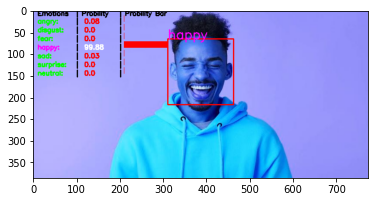

In [7]:
img_path = '../input/facial-expression-detection-dataset/images/man.jpg'
testing(img_path)

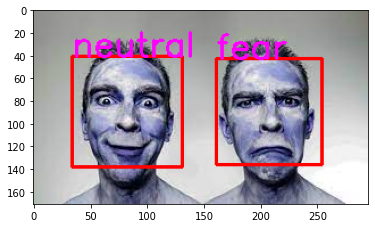

In [8]:
img_path = '../input/facial-expression-detection-dataset/images/ha.jpg'
testing_1(img_path)

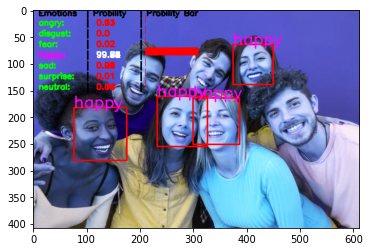

In [9]:
img_path = '../input/facial-expression-detection-dataset/images/grp.jpg'
testing(img_path)

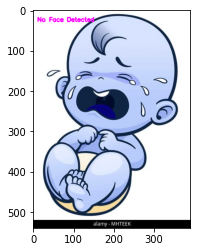

In [10]:
#not working on cartoons
img_path = '../input/facial-expression-detection-dataset/images/mhteek.jpg'
testing(img_path)

* If you find this helpful, I would really appreciate the upvote!

* If you see something wrong please let me know.

* And lastly Im happy to hear your thoughts about the notebook for me to also improve!